## Merge Sort

Merge Sort is an efficient, general-purpose, and comparison-based divide-and-conquer sorting algorithm. It's efficient and general purpose in that in it's worst case, it runs in $O(n\log{n})$ time, on par with the best of the classic sorting algorithms; comparison-based in that elements are directly compared to insert into the sorted array; and divide-and-conquer in that algorithm recursively sorts subarrays, effectively breaking up the problem into subproblems until a base case is reached.

The divide-and-conquer nature of this algorithm makes it a suitable candidate for parallel processing, further improving on the efficiency of such an algorithm. The default sorting algorithm for Python, TimSort, actually uses a hybrid of merge sort and insertion sort. Beyond sorting, Merge Sort has applications in polynomial multiplication, genomic sequencing, and comparative ranking systems.

## Implementation

In [4]:
import numpy as np

# General merge sort algorithm, recursively calls itself until the base case is reached.
def mergeSort(array):
  
  n = len(array)
  # base case of only one element in the array:
  if n <= 1:
    return array

  # setting the midpoint:
  if n%2 == 0:
      mid = int(n/2)
  else:
      mid = int(n/2)+1

  # splitting the array down the middle and recursively sorting the halves:
  left = mergeSort(array[0:mid])
  right = mergeSort(array[mid:n])

  # merging and returning the sorted halves of the array:
  return merge(left, right)

# Helper function for merging two already sorted halves of the array:
def merge(left, right):

  # initializing the resulting sorted array and the indices of interest:
  result = []
  i = 0
  j = 0

  # looping through the elements of both arrays to compare and place in sorted array:
  while i < len(left) and j < len(right):
    if left[i] <= right[j]:
      result.append(left[i])
      i += 1
    else:
      result.append(right[j])
      j += 1
   
  # the remaining elements can be assumed to be greater than all the elements already placed in the array, and will only come from one half of the array.

  # looping through the remaining elements to clean up and add to sorted array:
  while i < len(left):
    result.append(left[i])
    i += 1
  while j < len(right):
    result.append(right[j])
    j += 1

  # resulting array is fully sorted.
  return result

In [5]:
# Generating three test case arrays of length 10, 20, and 40, respectively. Each array has elements in the range of [1, 9].
ex1 = list(np.random.randint(1, 10, size=10))
ex2 = list(np.random.randint(1, 10, size=20))
ex3 = list(np.random.randint(1, 10, size=40))

# Printing the generated unsorted array and resulting sorted array for each generated array from above.
print(f"Unsorted: {ex1}")
print(f"Sorted: {mergeSort(ex1)}\n")
print(f"Unsorted: {ex2}")
print(f"Sorted: {mergeSort(ex2)}\n")
print(f"Unsorted: {ex3}")
print(f"Sorted: {mergeSort(ex3)}\n")

Unsorted: [1, 5, 8, 1, 9, 3, 1, 7, 9, 4]
Sorted: [1, 1, 1, 3, 4, 5, 7, 8, 9, 9]

Unsorted: [1, 1, 5, 4, 9, 6, 1, 4, 1, 1, 3, 8, 6, 6, 9, 2, 2, 6, 9, 2]
Sorted: [1, 1, 1, 1, 1, 2, 2, 2, 3, 4, 4, 5, 6, 6, 6, 6, 8, 9, 9, 9]

Unsorted: [9, 3, 7, 3, 9, 2, 2, 8, 7, 7, 9, 5, 5, 3, 8, 8, 9, 7, 5, 6, 9, 9, 2, 1, 5, 4, 4, 3, 2, 4, 5, 8, 1, 5, 6, 6, 1, 2, 4, 2]
Sorted: [1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9]



As seen in the source code above, merge sort is implemented using two different functions. The first function is merge sort which recursively splits the original input in half until each array is of size one. In order to do this, at each recursive call we find the midpoint of the input array and split the left side and right side into two different arrays. These subproblems are then passed into the merge function.

The merge function takes in two sorted halves of the array. It then loops through the elements of both arrays to compare and place the values in a final sorted array. Once one array is exhausted the remaining elements in the other array are added to the end of the result array. Finally we return the result array and our original input is now sorted.

## Experimental Analysis

The above implementation theoretically runs in $O(n \log (n))$ time, even more interesting is that this complexity is maintained for best-case and average-case test cases. This is due to the fundamental nature of this divide-and-conquer algorithm, the algorithm will break down an array and then remerge it even if it’s already sorted.

In terms of space complexity, merge sort is not done in-place, but it doesn’t necessarily make an exorbitant amount of copies when making comparisons. In the worst case space complexity, this algorithm would be $O(n)$.

Our experimental analysis reflects this, as the below plots show the theoretical time complexity plotted against their corresponding experimental values. It’s not entirely accurate to compare run time with number of operations and peak memory usage with theoretical array size, but the plots exhibit the correlation well. As input size grows, the plot conforms to the theoretical upper-bound.

It’s also interesting to note that the run time exceeds the theoretical upper bound for the smallest input sizes, this is likely a product of other function calls for testing memory allocation happening during testing.


In [6]:
import time
import matplotlib.pyplot as plt
import tracemalloc

# Measures the peak memory allocation and run time for the given input size:
def analysis(input_size):

    # Generating the test case with the given input size
    ex = np.random.randint(1, 100, int(input_size))

    # Setting a timer
    start_time = time.time()

    # Tracking memory allocation
    tracemalloc.start()

    # Calling the algorithm with the test case
    mergeSort(ex)

    # Extracting insights from memory allocation tracker
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    # Return the peak memory allocation and run time of test case
    return peak / 10**3, time.time()-start_time  # return in MB

# Initiate arrays for storing run times and memory usage, as well as input sizes for analysis
times = []
memory_usages = []
input_sizes = np.logspace(0, 6, 20)

# Looping through input sizes to measure each one
for input_size in input_sizes:
  mem, time_elapsed = analysis(input_size)
  times.append(time_elapsed)
  memory_usages.append(mem)

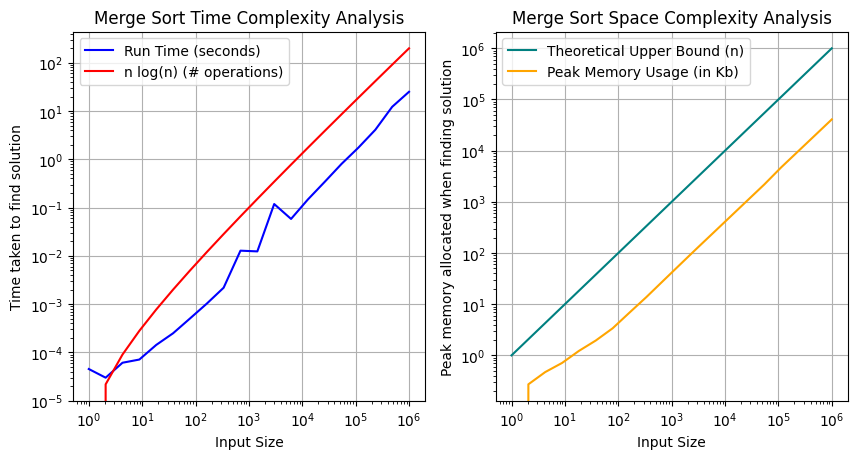

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(10)

# Plotting running time against theoretical upper bound
ax1.loglog(input_sizes, times, 'b-', label='Run Time (seconds)')
nlogn = np.log2(input_sizes) * input_sizes * 10**-5
ax1.loglog(input_sizes, nlogn, label='n log(n) (# operations)', color='red')

# Plotting memory usage against thoeretical upper bound
ax2.loglog(input_sizes, input_sizes, color='teal', label='Theoretical Upper Bound (n)')
ax2.loglog(input_sizes, memory_usages, label='Peak Memory Usage (in Kb)', color='orange')

# Add labels and title for first plot
ax1.set_xlabel("Input Size")
ax1.set_ylabel("Time taken to find solution")
ax1.set_title("Merge Sort Time Complexity Analysis")
ax1.grid(True)
ax1.legend()

# Add labels and title for second plot
ax2.set_xlabel("Input Size")
ax2.set_ylabel("Peak memory allocated when finding solution")
ax2.set_title("Merge Sort Space Complexity Analysis")
ax2.grid(True)
ax2.legend()

## Key Takeaways

From this project we learned that merge sort is a very useful and reliable sorting algorithm. The divide-and-conquer structure guarantees that the time complexity will always be $O(n \log (n))$ no matter what input it takes. Merge sort is very useful for very large datasets that need to be sorted. 

This algorithm does have some tradeoffs, specifically the temporary space it uses to sort the subproblems and its recursive nature. However, its guaranteed time complexity and ease of being scaled for larger and larger inputs makes it an extremely useful and powerful tool to sort data.